In [288]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

In [289]:
w_q  = 5e9 * 2 * np.pi

phi_1 = 0
N = 30
alpha = -100e6*2*np.pi
w_1  = 5e9 * 2 * np.pi

q = destroy(N)

tlist = np.linspace(0,1e-7,10000)

t0 = 5e-8
tau = 5e-8

P = 3*np.pi

eps_1 = P/tau/np.sqrt(np.pi/6)*np.exp(-6*((tlist-t0)/tau)**2)*1j  # envelope

H0 = w_q * q.dag() * q + alpha*(q.dag()*q.dag()*q*q)

H1_1 = q.dag()

H1_2 = q

#blais 2021 convention
H = [[H0, tlist*0 + 1],[H1_1,eps_1*np.exp(-1j*w_1*tlist - 1j*phi_1)],[H1_2,np.conj(eps_1)*np.exp(1j*w_1*tlist + 1j*phi_1)]]

H0.eigenenergies()/(2*np.pi)

c_op_list = []

kappa = 1e3 * 2*np.pi           # qb dissipation rate
n_th_a = 0.0

rate = kappa * (1 + n_th_a)
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * q)

rate = kappa * n_th_a
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * q.dag())

In [290]:
psi_0 = coherent(N,0)

output1 = mesolve(H, psi_0, tlist, c_ops = c_op_list, e_ops = [q.dag()*q])

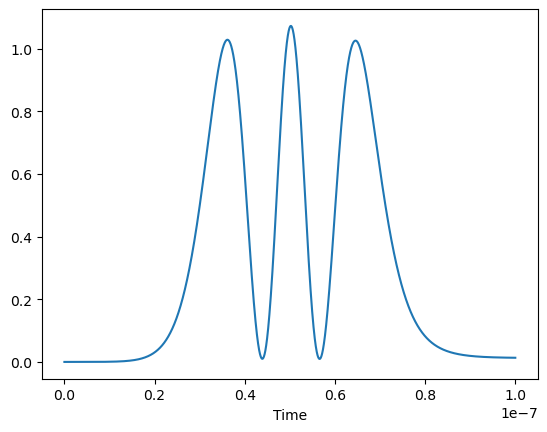

In [291]:
plt.plot(tlist, output1.expect[0])
plt.xlabel('Time')
plt.show()